___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
**NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way!**
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

    conda install -c anaconda pandas-datareader

### The Imports

Already filled out for you.

In [91]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
* Bank of America, BAC
* CitiGroup, C
* Goldman Sachs, GS
* JPMorgan Chase, JPM
* Morgan Stanley, MS
* Wells Fargo, WFC

**
Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

**Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

Try

    BAC = data.DataReader("BAC", 'yahoo', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

    df = pd.read_pickle('all_banks')

In [23]:
start = datetime.datetime(2006, 1, 1).date()
end = datetime.datetime(2016, 1, 1).date()

In [24]:
start

datetime.date(2006, 1, 1)

In [25]:
end

datetime.date(2016, 1, 1)

**Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [31]:
BAC = data.DataReader("BAC", 'yahoo', start, end)
C = data.DataReader("C", 'yahoo', start, end)
GS = data.DataReader("GS", 'yahoo', start, end)
JPM = data.DataReader("JPM", 'yahoo', start, end)
MS = data.DataReader("MS", 'yahoo', start, end)
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [30]:
BAC.head(2)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.298687
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.923801


In [32]:
C.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,445.561951
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870900.0,437.335999


In [33]:
GS.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,107.575417
2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,106.089539


In [34]:
JPM.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,40.360001,39.299999,39.830002,40.189999,12838600.0,27.529718
2006-01-04,40.139999,39.419998,39.779999,39.619999,13491500.0,27.370821


In [35]:
MS.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,37.758644
2006-01-04,59.279999,58.349998,58.700001,58.349998,7977800.0,37.784546


In [36]:
WFC.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,31.975,31.195,31.600000,31.900000,11016400.0,20.823185
2006-01-04,31.820,31.365,31.799999,31.530001,10870000.0,20.581659


In [37]:
tickers = 'BAC C GS JPM MS WFC'.split()

In [38]:
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [48]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis=1, keys=tickers) # concat on cols

In [49]:
bank_stocks.head(2)

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.298687   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.923801   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   

                                                WFC                     \
                Close     Volume  Adj Close    High     Low       Open   
Date                                                                     
2006-01-03  58.310001  5377000.0  37.758644  31.975  31.195  31.600000   
2006-01-04  58.349998  7977800.0  37.784546  31.820  31.365  31.799999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.823185  
2006-01-04  31.530001  10870000.0  20.581659  

[2 rows x 36 columns]

In [50]:
bank_stocks.tail(2)

BAC                                                          \
             High        Low       Open      Close      Volume  Adj Close   
Date                                                                        
2015-12-30  17.24  17.040001  17.200001  17.049999  35066400.0  15.766198   
2015-12-31  17.07  16.830000  17.010000  16.830000  47153000.0  15.562767   

                    C                           ...     MS             \
                 High    Low   Open      Close  ...   Open      Close   
Date                                            ...                     
2015-12-30  52.939999  52.25  52.84  52.299999  ...  32.50  32.230000   
2015-12-31  52.389999  51.75  52.07  51.750000  ...  31.91  31.809999   

                                        WFC                                   \
               Volume  Adj Close       High        Low       Open      Close   
Date                                                                           
2015-12-30  5057200.0  29.146427  55.310001  54.790001  55.270000  54.889999   
2015-12-31  8154300.0  28.766611  54.950001  54.220001  54.509998  54.360001   

                                   
                Volume  Adj Close  
Date                               
2015-12-30   8016900.0  47.796970  
2015-12-31  10929800.0  47.335461  

[2 rows x 36 columns]

**Set the column name levels (this is filled out for you):**

In [51]:
bank_stocks.columns

MultiIndex([('BAC',      'High'),
            ('BAC',       'Low'),
            ('BAC',      'Open'),
            ('BAC',     'Close'),
            ('BAC',    'Volume'),
            ('BAC', 'Adj Close'),
            (  'C',      'High'),
            (  'C',       'Low'),
            (  'C',      'Open'),
            (  'C',     'Close'),
            (  'C',    'Volume'),
            (  'C', 'Adj Close'),
            ( 'GS',      'High'),
            ( 'GS',       'Low'),
            ( 'GS',      'Open'),
            ( 'GS',     'Close'),
            ( 'GS',    'Volume'),
            ( 'GS', 'Adj Close'),
            ('JPM',      'High'),
            ('JPM',       'Low'),
            ('JPM',      'Open'),
            ('JPM',     'Close'),
            ('JPM',    'Volume'),
            ('JPM', 'Adj Close'),
            ( 'MS',      'High'),
            ( 'MS',       'Low'),
            ( 'MS',      'Open'),
            ( 'MS',     'Close'),
            ( 'MS',    'Volume'),
            ( 

In [52]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [53]:
bank_stocks.columns

MultiIndex([('BAC',      'High'),
            ('BAC',       'Low'),
            ('BAC',      'Open'),
            ('BAC',     'Close'),
            ('BAC',    'Volume'),
            ('BAC', 'Adj Close'),
            (  'C',      'High'),
            (  'C',       'Low'),
            (  'C',      'Open'),
            (  'C',     'Close'),
            (  'C',    'Volume'),
            (  'C', 'Adj Close'),
            ( 'GS',      'High'),
            ( 'GS',       'Low'),
            ( 'GS',      'Open'),
            ( 'GS',     'Close'),
            ( 'GS',    'Volume'),
            ( 'GS', 'Adj Close'),
            ('JPM',      'High'),
            ('JPM',       'Low'),
            ('JPM',      'Open'),
            ('JPM',     'Close'),
            ('JPM',    'Volume'),
            ('JPM', 'Adj Close'),
            ( 'MS',      'High'),
            ( 'MS',       'Low'),
            ( 'MS',      'Open'),
            ( 'MS',     'Close'),
            ( 'MS',    'Volume'),
            ( 

**Check the head of the bank_stocks dataframe.**

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

In [54]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.923801  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.968796  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.916302  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.938789  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.758644  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.784546  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.888165  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.927017  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  38.328484  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.823185  
2006-01-04   31.799999  31.530001  10870000.0  20.581659  
2006-01-05   31.500000  31.495001  10158000.0  20.558811  
2006-01-06   31.580000  31.680000   8403800.0  20.679575  
2006-01-09   31.674999  31.674999   5619600.0  20.676311  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

.xs() is cross-section, Allows you to fetch from a multi-level index 

**What is the max Close price for each bank's stock throughout the time period?**

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [70]:
bank_stocks['GS']['Adj Close'].max()

210.0593719482422

In [71]:
bank_stocks['GS']['Close'].max()

247.9199981689453

In [66]:
bank_stocks.columns.levels

FrozenList([['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']])

In [79]:
# Jose Solution 1
for tick in tickers:
    print(bank_stocks[tick]['Close'].max())

54.900001525878906
564.0999755859375
247.9199981689453
70.08000183105469
89.30000305175781
58.52000045776367


In [82]:
# Jose Solution 2 - best solution using .xs()
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [84]:
returns = pd.DataFrame()

In [86]:
returns.head(2)

""


**We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [88]:
for tick in tickers:
    returns[tick] = bank_stocks[tick]['Close'].pct_change()

In [90]:
returns.head()
# first value will be Null, can't get a percentage change on 1 point

,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


**Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

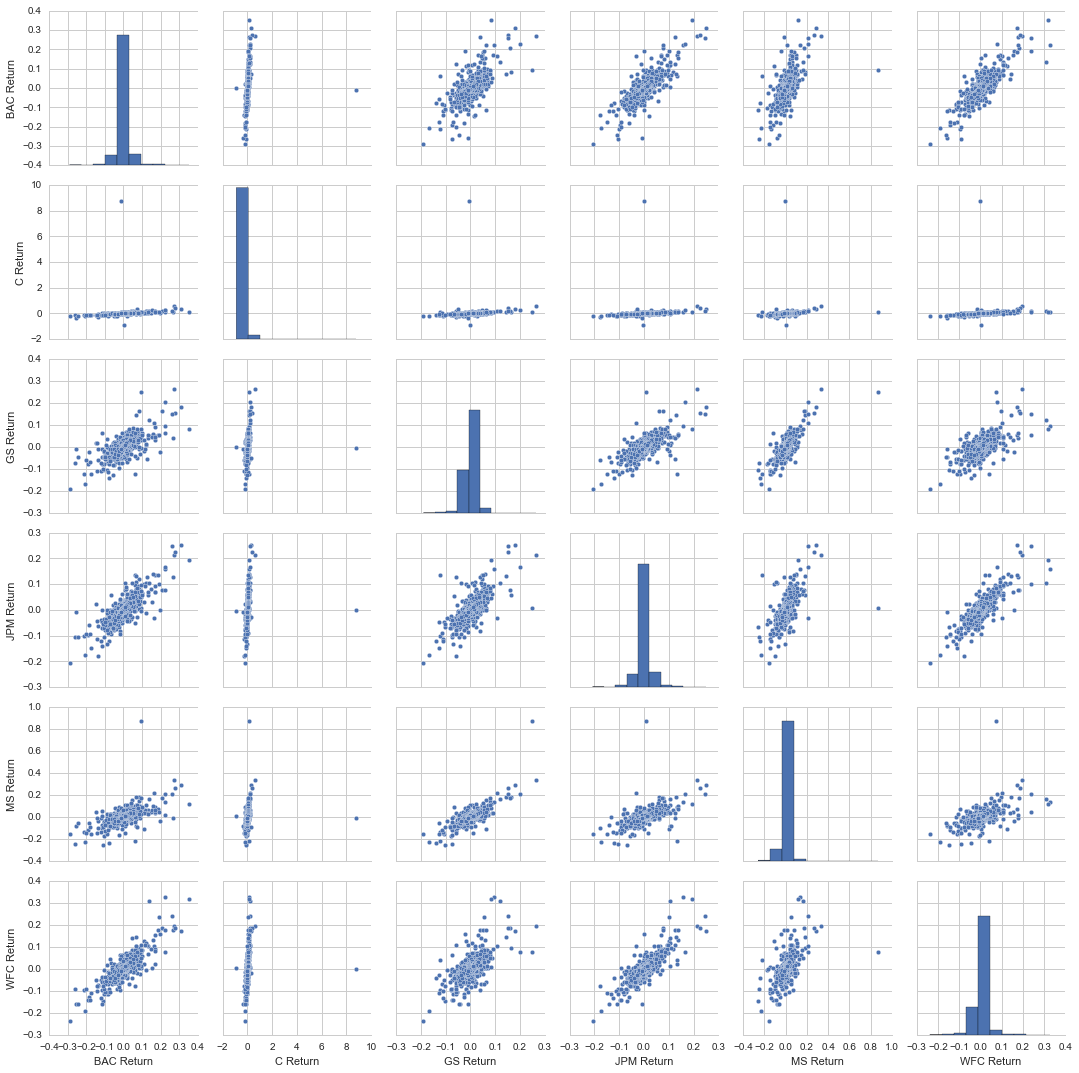

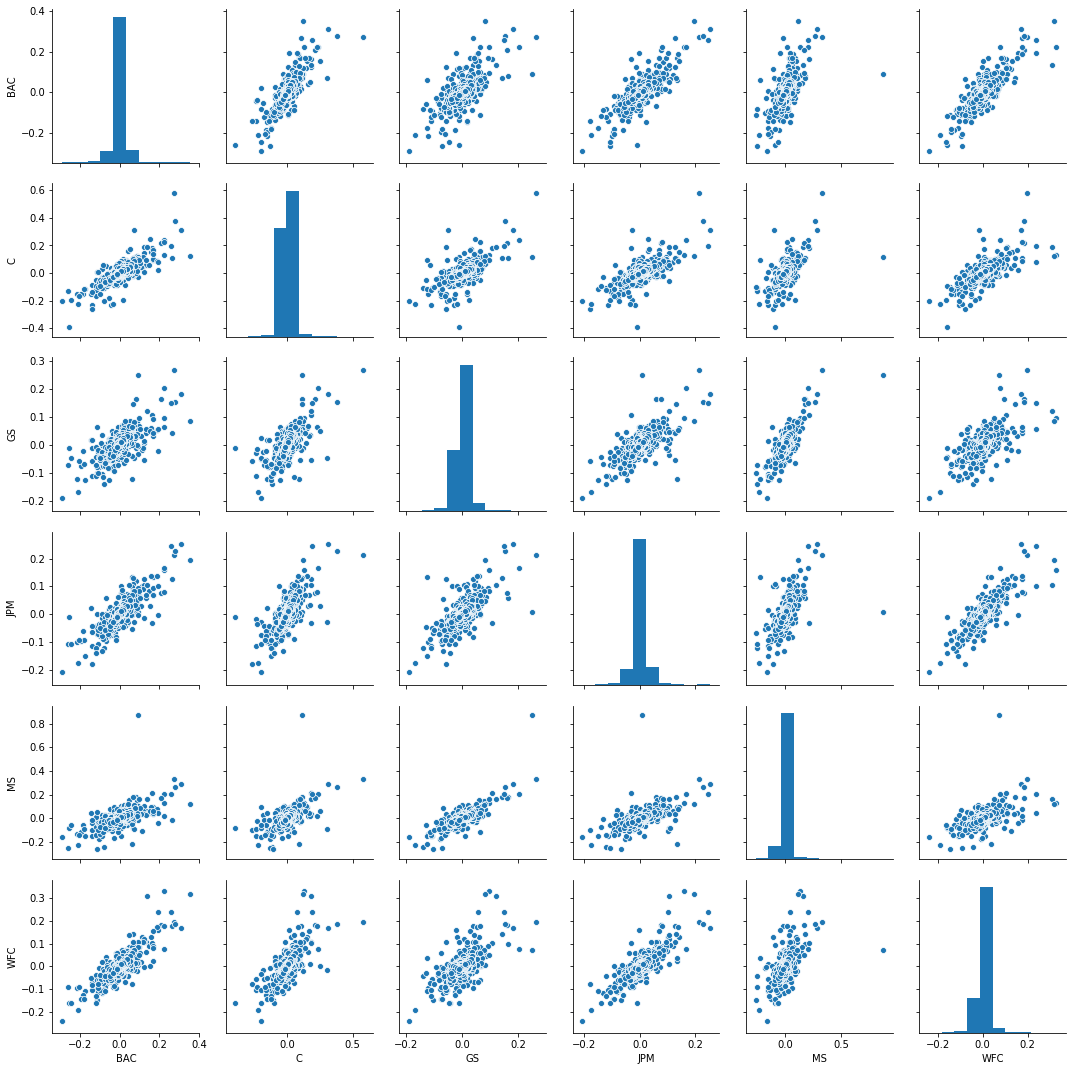

In [93]:
sns.pairplot(returns[1:]) # remove null row
# Citibank has one outlier in Google data, not in Yahoo data
# Nov 2008 Citigroup was insolvent, had a huge crash

* See solution for details about Citigroup behavior....

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [75]:
# worst returns date

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [76]:
# best returns date

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [94]:
returns.max()

BAC    0.352691
C      0.578249
GS     0.264678
JPM    0.250967
MS     0.869835
WFC    0.327645
dtype: float64

In [95]:
returns.min()

BAC   -0.289694
C     -0.390244
GS    -0.189596
JPM   -0.207274
MS    -0.258929
WFC   -0.238223
dtype: float64

In [101]:
returns['BAC'].idxmin() # idxmin() replaced argmin()

Timestamp('2009-01-20 00:00:00')

In [102]:
returns.idxmin() # worst returns date

BAC   2009-01-20
C     2009-02-27
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

In [103]:
returns.idxmax() # best returns date

BAC   2009-04-09
C     2008-11-24
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

**You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anything significant happen in that time frame?**

* See Solution for details

In [ ]:
# worst days for most banks was 20 Jan 2009, which was Obama's inauguration day - correlated?
# JP Morgan's biggest return was very next day, 21 Jan 2009
# Citi's worst based on google data (not yahoo) was 6 May 2011 and best on 9 May 2011 - Citi annouces Reverse Stock Split

**Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [81]:
# entire period - most risky is citbank

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [88]:
# 2015 - most risky is Morgan Stanley

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [108]:
returns.std() # Std entire period - most risky is citibank

BAC    0.036647
C      0.038672
GS     0.025390
JPM    0.027667
MS     0.037819
WFC    0.030238
dtype: float64

In [114]:
returns.loc['2015-01-01':'2015-12-31'].std() # Std 2015 - most risky is Morgan Stanley

BAC    0.016163
C      0.015289
GS     0.014046
JPM    0.014017
MS     0.016249
WFC    0.012591
dtype: float64

**Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



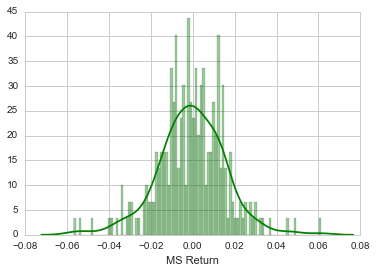

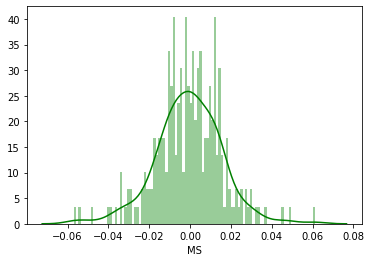

In [123]:
# distplot using seaborn of the 2015 returns for Morgan Stanley
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS'][1:], bins=100, color='green')
# pretty normally distrubited returns

**Create a distplot using seaborn of the 2008 returns for CitiGroup**

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



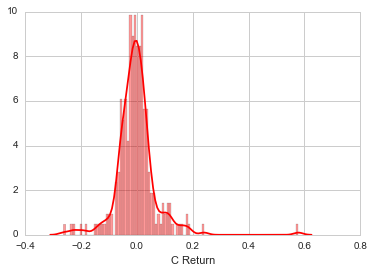

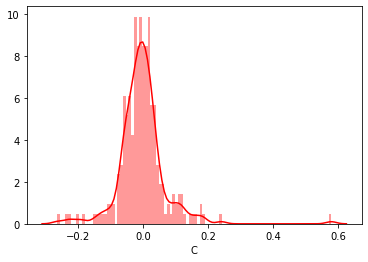

In [124]:
# distplot using seaborn of the 2008 returns for CitiGroup
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C'][1:], bins=100, color='red')
# More extreme positive Outliers for Citi in 2008

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

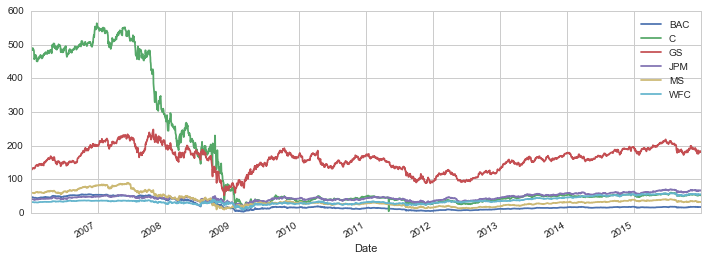

In [17]:
# pandas plot using for loop

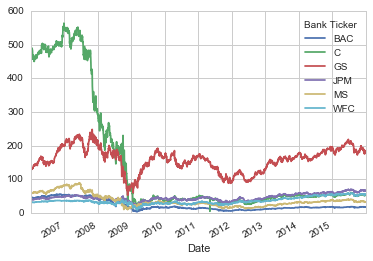

In [18]:
# pandas plot using .xs()

In [19]:
# plotly-cufflinks

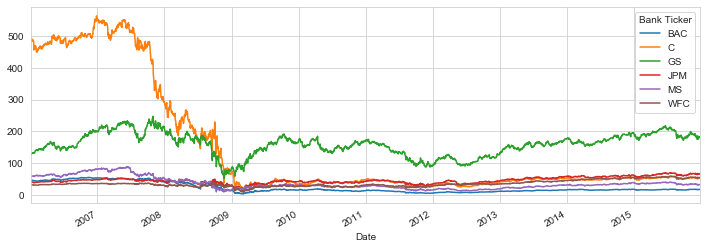

In [129]:
#pandas
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(figsize=(12,4))

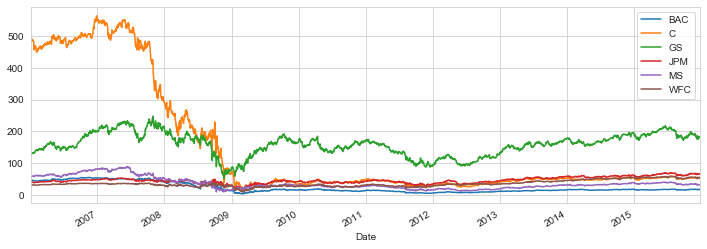

In [134]:
# pandas Jose solution
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick, figsize=(12,4))
plt.legend()

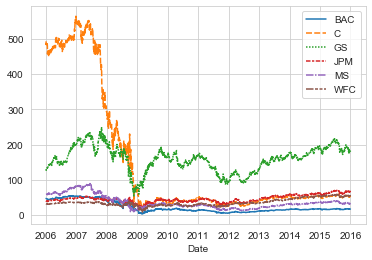

In [132]:
# seaborn
sns.lineplot(data=bank_stocks.xs(key='Close', axis=1, level='Stock Info'))

In [135]:
# plotly and cufflinks
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

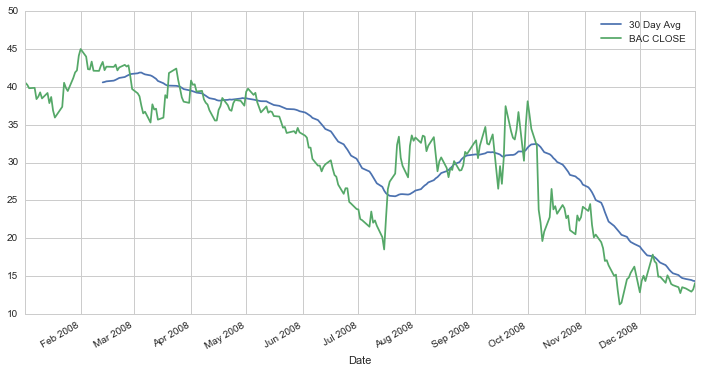

In [137]:
# Use BAC dataframe
BAC.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.298687
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.923801


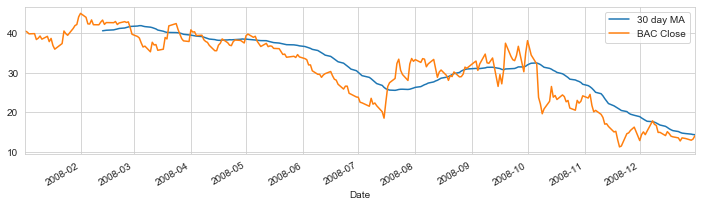

In [146]:
# Pandas .rolling() method to create moving avg (MA)
# change window as needed for 7 day, 60 day MA
BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30 day MA', figsize=(12,3))
BAC['Close'].loc['2008-01-01':'2008-12-31'].plot(label='BAC Close')
plt.legend()

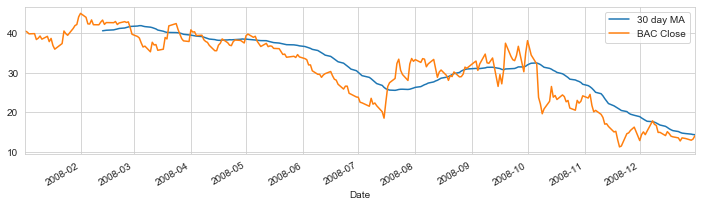

In [153]:
# could also do off the bank_stocks DF using method
bank_stocks.xs(key='Close', axis=1, level='Stock Info')['BAC'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30 day MA', figsize=(12,3))
bank_stocks.xs(key='Close', axis=1, level='Stock Info')['BAC'].loc['2008-01-01':'2008-12-31'].plot(label='BAC Close')
plt.legend()

**Create a heatmap of the correlation between the stocks Close Price.**

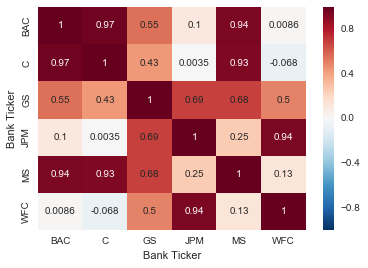

In [155]:
# corr matrix of close
bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


Text(0.5, 1, 'Banks Close Price Corr')

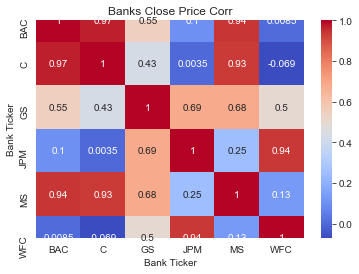

In [157]:
# seaborn heatmap
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), cmap='coolwarm', annot=True)
plt.title('Banks Close Price Corr')

**Optional: Use seaborn's clustermap to cluster the correlations together:**

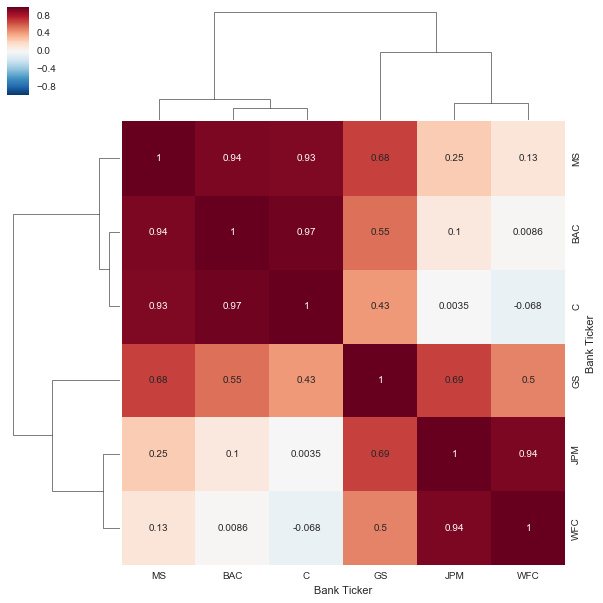

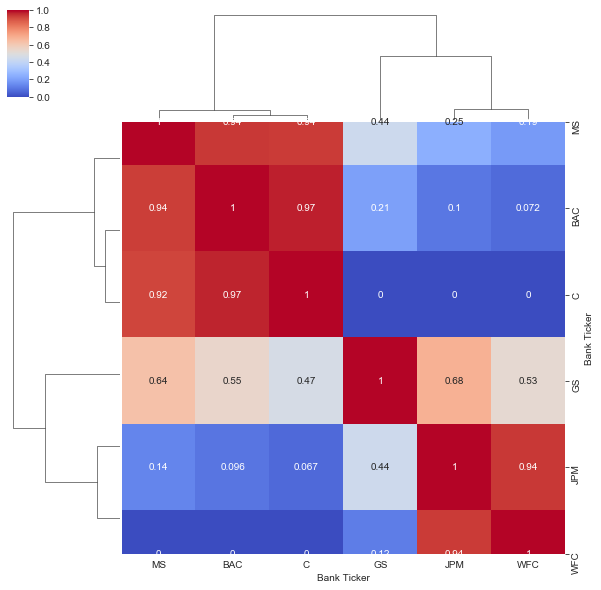

In [159]:
# Seaborn cluster
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), cmap='coolwarm', standard_scale=1, annot=True)
# clustermap groups Citi, BoA, Morgan Stanley as being correlated
# and Wells Fargo, JP Morgan, Goldam as another group that's correlated

In [166]:
# Heatmap using Plotly
bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr().iplot(kind='heatmap', colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

**Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [164]:
bank_stocks['BAC'].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [171]:
# Jose solution - cols need to be in certain order for Candlestick plot
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [172]:
# Jose solution - cols need to be in certain order for Candlestick plot
bac15 = BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind='candle')

**Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [179]:
# on the Close price only for Morgan Stanley
# specify multiple periods
bank_stocks['MS'].loc['2015-01-01':'2016-01-01']['Close'].ta_plot(study='sma', periods=[13,21,55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [182]:
# on the Close price only for BoA
bank_stocks['BAC'].loc['2015-01-01':'2016-01-01']['Close'].ta_plot(study='boll')

In [183]:
# change periods
bank_stocks['BAC'].loc['2015-01-01':'2016-01-01']['Close'].ta_plot(study='boll', period=21)

In [181]:
# multi periods
bank_stocks['BAC'].loc['2015-01-01':'2016-01-01']['Close'].ta_plot(study='boll', period=[21,55])

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.